In [8]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet

#Load the data
df = pd.read_csv('book1.csv')
df1 = pd.read_csv('book1.csv')
df = df.drop(['Province_State','Last_Update','Lat','Long_','Combined_Key','Incident_Rate','Case_Fatality_Ratio'],axis=1)

#View the data
df.head()

,FIPS,Confirmed,Deaths,Recovered,Active
0,6-10-2020,34914,307,18325,16282
1,6-11-2020,38716,349,20705,17662
2,6-12-2020,38716,349,20705,17662
3,6-13-2020,40698,367,22047,18284
4,6-14-2020,42687,397,23409,18881


In [2]:
df.rename(columns = {'FIPS':'ds','Confirmed':'y'}, inplace = True)

m = Prophet()
m.fit(df)

16:54:33 - cmdstanpy - INFO - Chain [1] start processing
16:54:33 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FIPS       205 non-null    object
 1   Confirmed  205 non-null    int64 
 2   Deaths     205 non-null    int64 
 3   Recovered  205 non-null    int64 
 4   Active     205 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.1+ KB


In [10]:
#Describe the data

df.describe()

,Confirmed,Deaths,Recovered,Active
count,205.000000,205.000000,205.000000,205.000000
mean,491088.619512,7616.180488,448665.668293,34806.770732
std,266113.021371,4032.193428,272137.937656,17014.127678
min,34914.000000,307.000000,18325.000000,8615.000000
25%,245859.000000,3935.000000,183956.000000,17748.000000
50%,541993.000000,8811.000000,486479.000000,42958.000000
75%,748225.000000,11387.000000,718129.000000,50213.000000
max,817077.000000,12109.000000,796353.000000,57968.000000


In [11]:
#Find the duplicates

df.duplicated().sum()

0

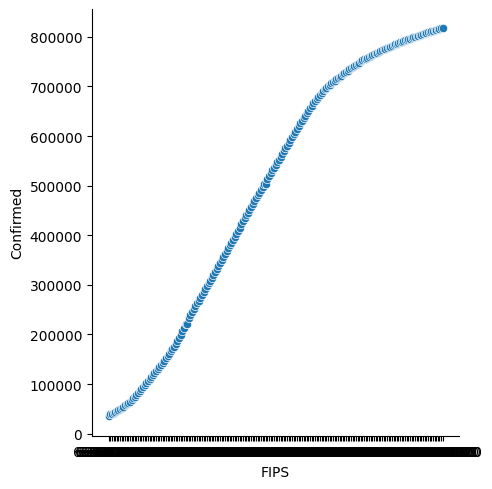

In [12]:
#Plot the Confirmed with date

tips = sns.load_dataset("tips")
sns.relplot(data=tips, x=df1['FIPS'], y=df['Confirmed'])


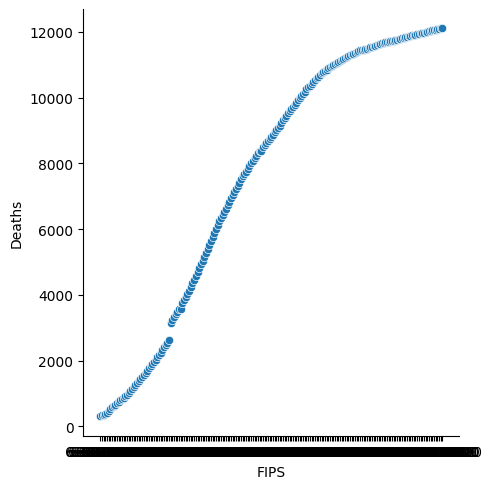

In [13]:
#Plot the death with date

tips = sns.load_dataset("tips")
sns.relplot(data=tips, x=df1['FIPS'], y=df['Deaths'])

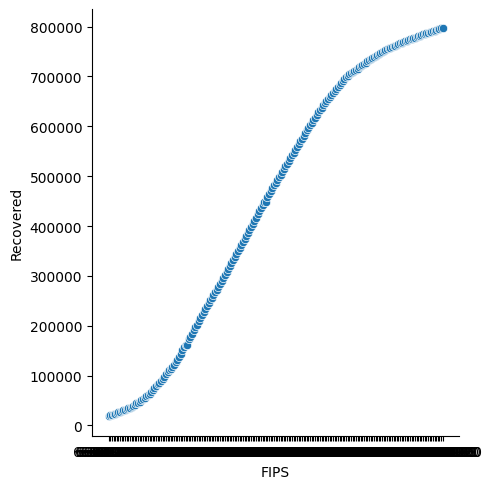

In [14]:
#Plot the recoverd with date

tips = sns.load_dataset("tips")
sns.relplot(data=tips, x=df1['FIPS'], y=df['Recovered'])

In [15]:
#Find null values

df.isnull().sum()

FIPS         0
Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64

In [16]:
#Datatypes

df.dtypes

FIPS         object
Confirmed     int64
Deaths        int64
Recovered     int64
Active        int64
dtype: object

<AxesSubplot:>

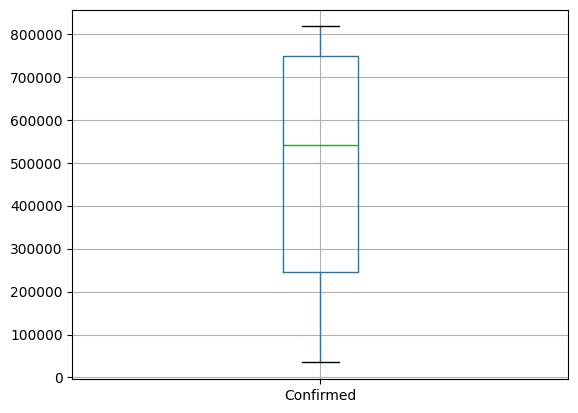

In [17]:
#Boxplot

df[['Confirmed']].boxplot()

In [18]:
#Correlation 

df.corr()

C:\Users\vibi\AppData\Local\Temp\ipykernel_11672\1008123944.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Confirmed,Deaths,Recovered,Active
Confirmed,1.000000,0.995999,0.998617,-0.568033
Deaths,0.995999,1.000000,0.990624,-0.503723
Recovered,0.998617,0.990624,1.000000,-0.610514
Active,-0.568033,-0.503723,-0.610514,1.000000


C:\Users\vibi\AppData\Local\Temp\ipykernel_11672\2156322774.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

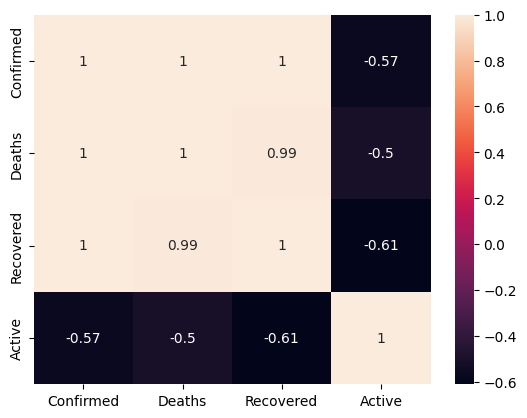

In [19]:
#Correlation plot

sns.heatmap(df.corr(),annot=True)